# Module 6 - Overtraining and Validation


## Exercise 1

As with the last module the first things you will need to do are:

1. Import tensorflow, numpy and anything else you think you'll need
1. Setup an interactive tensorflow session

One problem with the revised train_it function is that frequently it takes a while for the model to get started:

- Subclass your classifier overriding the train_it function
- Your train_it function should take four parameters:
   1. The maximum number of training epochs to run
   1. The number of epochs to *always* run
   1. The number of epochs to evaluate to see if the accuracy has stabilized
   1. The mini-batch size (default to 50)
- The training run should not start looking to stop until after the number of epochs specified by the second parameter is performed.
- The best performing (on the validation dataset) configuration should be saved and restored.

Yon can configure the network how you would like with respect to layers. Try to balance the layers and their widths with the time required to train the model.

In [1]:
import sys
sys.path.insert(0,'../PythonModules')

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np
import tensorflow as tf
import lzma
import pickle

In [3]:
import LectureClassifier as lc
from MLClassUtilities import get_batch

In [4]:
sess = tf.InteractiveSession()

In [5]:
class Mod6Ex1(lc.Classifier):

    def __init__(self, n_classes=3):
        self.validation_accuracy = []
        super().__init__(n_classes=n_classes)
            
    def train_it(self, max_epochs, init_epochs=0, eval_epochs=10,  batch_size=50):
        
        best_valid_accuracy = 0.0
        best_epoch = 0

        self.sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        
        for epoch in range(max_epochs):

            print("Running epoch:", epoch)

            for x_batch, y_batch, _ in get_batch(self.train,
                                                 batch_size,
                                                 1,
                                                 n_classes = self.n_classes):

                self.sess.run(self.train_step, feed_dict={self.x: x_batch,
                                                          self.y: y_batch})

            va = self.validate()
            self.validation_accuracy.append(va)
            print("   Validation accuracy", va)
    
            if va > best_valid_accuracy:
                best_valid_accuracy = va
                best_epoch = epoch
                saved = saver.save(self.sess, "./StoppingClassifierSave")
            
            if epoch >= init_epochs and epoch - best_epoch > eval_epochs:
                print("Validation accuracy hasn't improved in", eval_epochs, "epochs, stopping")
                break
                
        saver.restore(self.sess, saved)

In [6]:
data_file = '../../ARC_NN_Course_Data/AuShTr.ubyte.pkl.xz'

cs1 = Mod6Ex1()
cs1.load_data(data_file)
cs1.build_model()
%time cs1.train_it(100, 10)
print("Test dataset accuracy", cs1.accuracy)

Created session
Running epoch: 0
   Validation accuracy 0.622449
Running epoch: 1
   Validation accuracy 0.5969388
Running epoch: 2
   Validation accuracy 0.63265306
Running epoch: 3
   Validation accuracy 0.63265306
Running epoch: 4
   Validation accuracy 0.65816325
Running epoch: 5
   Validation accuracy 0.6658163
Running epoch: 6
   Validation accuracy 0.67091835
Running epoch: 7
   Validation accuracy 0.5714286
Running epoch: 8
   Validation accuracy 0.6122449
Running epoch: 9
   Validation accuracy 0.56377554
Running epoch: 10
   Validation accuracy 0.6683673
Running epoch: 11
   Validation accuracy 0.6147959
Running epoch: 12
   Validation accuracy 0.5255102
Running epoch: 13
   Validation accuracy 0.6964286
Running epoch: 14
   Validation accuracy 0.53061223
Running epoch: 15
   Validation accuracy 0.54846936
Running epoch: 16
   Validation accuracy 0.6811224
Running epoch: 17
   Validation accuracy 0.61734694
Running epoch: 18
   Validation accuracy 0.60459185
Running epoch: 19

## Exercise 2 - Homework (optional)

There are a number of possible methods for determining when to stop. A more sophisticated approach to early stoppping is the use of a moving average. In this method the last $n$ epoch's validation accuracy is averaged. If this average doesn't improve by some value, $\epsilon$ over time (usually checked every $n$ epochs), the run is stopped and rolled back to it's best, saved, configuration.

- Subclass your classifier overriding the train_it function
- Your train_it function should take 5 parameters:
   1. The maximum number of training epochs to run
   1. The number of epochs to *always* run
   1. The number of epochs to average to see if the accuracy has stabilized
   1. The tolerace $\epsilon$ value to test
   1. How often the average should be checked (epochs)
- The training run should not start looking to stop until after the number of epochs specified by the second parameter is performed.
- The best performing (on the validation dataset) configuration should be saved and restored.

You will need to experiment with the various parameters to see what works best for you.
Yon can configure the network how you woould like with respect to layers. Try to balance the layers and their widths with the time required to train the model.

In [7]:
class Mod6Ex2(Mod6Ex1):

    def train_it(self, max_epochs, init_epochs=0, avg_epochs=10, epsilon=0.05, freq=10, batch_size=50):
        
        best_valid_accuracy = 0.0
        best_epoch = 0
        last_avg = None
        
        self.sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        
        for epoch in range(max_epochs):

            print("Running epoch:", epoch)

            for x_batch, y_batch, _ in get_batch(self.train,
                                                 batch_size,
                                                 1,
                                                 n_classes = self.n_classes):

                self.sess.run(self.train_step, feed_dict={self.x: x_batch,
                                                          self.y: y_batch})

            va = self.validate()
            self.validation_accuracy.append(va)
            print("   Validation accuracy", va)
    
            if va > best_valid_accuracy:
                best_valid_accuracy = va
                best_epoch = epoch
                saved = saver.save(self.sess, "./StoppingClassifierSave")

            if epoch > init_epochs and epoch % freq:
                avg = np.mean(self.validation_accuracy[-avg_epochs:])
                if not last_avg is None and last_avg + epsilon > avg:
                    print("Moving average didn't improve, stopping")
                    break
                last_avg = avg
                
        saver.restore(self.sess, saved)

In [8]:
cs2 = Mod6Ex2()
cs2.load_data(data_file)
cs2.build_model()
%time cs2.train_it(100, 20)
print("Test dataset accuracy", cs2.accuracy)

Created session
Running epoch: 0
   Validation accuracy 0.5816327
Running epoch: 1
   Validation accuracy 0.58928573
Running epoch: 2
   Validation accuracy 0.6122449
Running epoch: 3
   Validation accuracy 0.6530612
Running epoch: 4
   Validation accuracy 0.57908165
Running epoch: 5
   Validation accuracy 0.6147959
Running epoch: 6
   Validation accuracy 0.66071427
Running epoch: 7
   Validation accuracy 0.6964286
Running epoch: 8
   Validation accuracy 0.5867347
Running epoch: 9
   Validation accuracy 0.49489796
Running epoch: 10
   Validation accuracy 0.5688776
Running epoch: 11
   Validation accuracy 0.6377551
Running epoch: 12
   Validation accuracy 0.5867347
Running epoch: 13
   Validation accuracy 0.5229592
Running epoch: 14
   Validation accuracy 0.6479592
Running epoch: 15
   Validation accuracy 0.65561223
Running epoch: 16
   Validation accuracy 0.5867347
Running epoch: 17
   Validation accuracy 0.68877554
Running epoch: 18
   Validation accuracy 0.7117347
Running epoch: 19
 

## Exercise 3

Run the classifiers from exercises 1 and 2 then graph the results (Validation accuracy vs epoch).

<IPython.core.display.Javascript object>


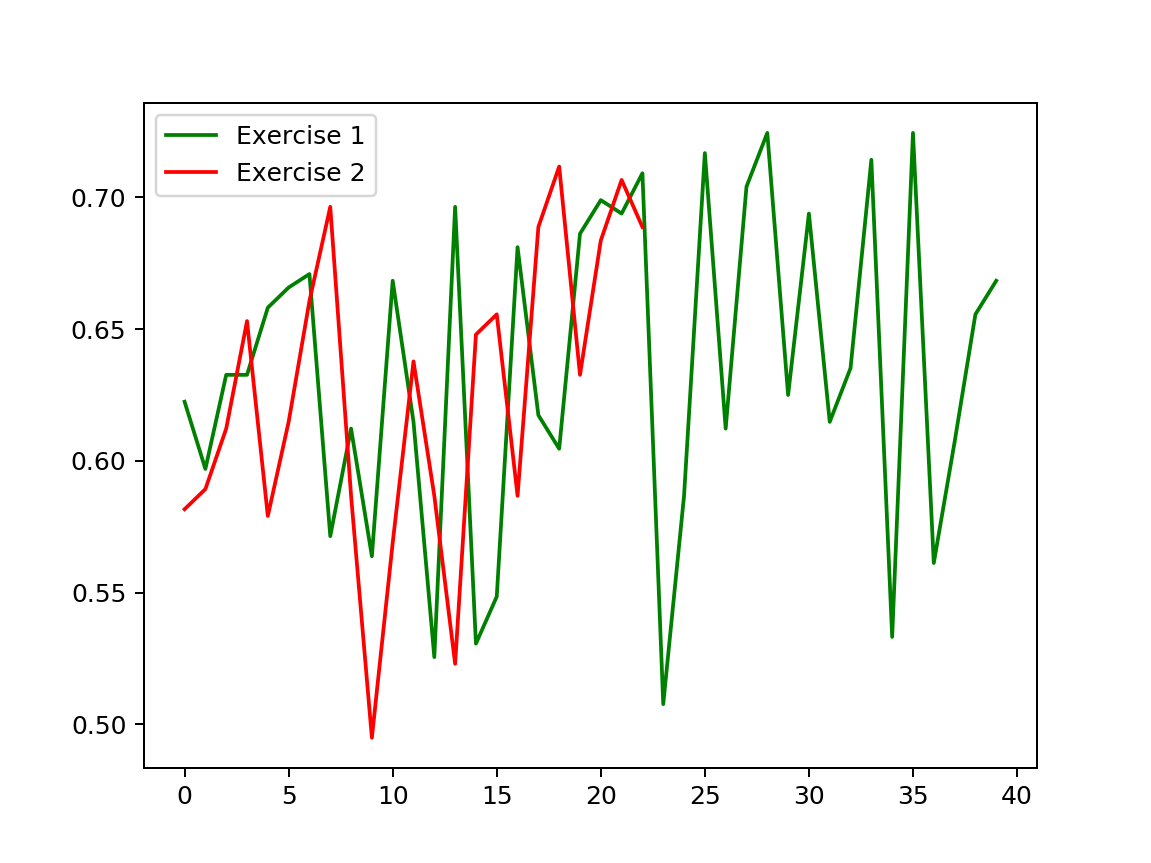

In [9]:
plt.plot(range(len(cs1.validation_accuracy)), cs1.validation_accuracy, 'g-', label="Exercise 1")
plt.plot(range(len(cs2.validation_accuracy)), cs2.validation_accuracy, 'r-', label="Exercise 2")
plt.legend();